# PyLASCA
a tool for ...

## square detector
detect landmarks on a real color image for future coordinate transformation 

by

Sebastian Malkusch

2020-04-15

Institute for clinical pharmacology,

data science division,

Goethe-University Frankfurt,

Germany

malkusch@med.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de

## Load libraries

In [1]:
import cv2 as cv
from ipywidgets import interact
from pyLASCA.gui import squareWidgets
from pyLASCA.source import fileNames
from pyLASCA.source import squareDetector
from pyLASCA.source import sigmaDetector
widgets = squareWidgets.SquareWidgets()
fn = fileNames.FileNames()
vertex = squareDetector.SquareDetector()
sigma = sigmaDetector.SigmaDetector()

PyLascaWidgets initialized


## Import
Load an rgb real color image on which landmarks are to be detected.

In [2]:
display(widgets.pathText, widgets.pathButton)

Text(value='', description='path to file', placeholder='enter a string', style=DescriptionStyle(description_wi…

Button(description='browse', icon='check', style=ButtonStyle(), tooltip='Click me')

Button(description='import', icon='check', style=ButtonStyle(), tooltip='Click me')

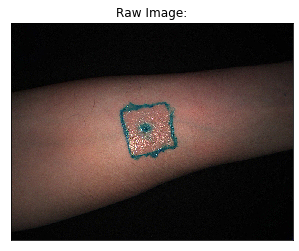

/Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 01/Tag 2/SCTCAPS 01 #2  15min (Colour).jpg


In [3]:
display(widgets.importButton)

def runImport(event):
    widgets.clearOutput()
    display(widgets.importButton)
    if(widgets.fileName):
        fn.fileName = widgets.fileName
        fn.splitFileName()
        vertex.loadImage(fn.fileName)
        sigma.updateSeed()
        sigma.loadImage(fn.fileName)
        vertex.drawImage()
        print(fn.fileName)
    
widgets.importButton.on_click(runImport)

## Sigma Detection

In [4]:
display(widgets.sigmaAnalysisButton)

def runSigmaAnalysis(event):
    widgets.clearOutput()
    display(widgets.sigmaAnalysisButton)
    if widgets.fileName:
        sigma.gui()
        widgets.sigmaText.value = sigma.sigma
        print("User defined sigme: %.1f" %(sigma.sigma))
        
        

widgets.sigmaAnalysisButton.on_click(runSigmaAnalysis)

Button(description='analysis', icon='check', style=ButtonStyle(), tooltip='Click me')

User defined sigme: 5.0


## Vertex Analysis

BoundedFloatText(value=120.0, description='pxl size [mm]', max=200.0, step=0.1, style=DescriptionStyle(descrip…

BoundedFloatText(value=5.0, description='sigma', max=20.0, min=0.1, step=0.1, style=DescriptionStyle(descripti…

FloatSlider(value=5.0, continuous_update=False, description='sigma', max=20.0, min=0.1, readout_format='.3f', …

Button(description='analysis', icon='check', style=ButtonStyle(), tooltip='Click me')

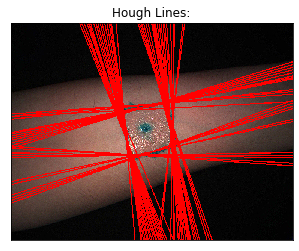

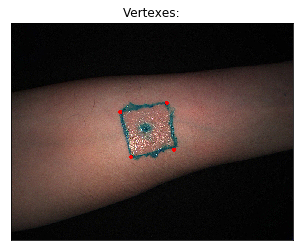

,x_pxl,y_pxl,x_mm,y_mm,alpha
2,434.284668,339.525543,52114.160156,40743.066406,53.256760
1,415.015533,214.347137,49801.863281,25721.656250,146.100052
3,291.466309,239.162918,34975.957031,28699.550781,236.497742
0,320.982758,359.474152,38517.929688,43136.898438,328.073883


In [5]:
display(widgets.pxlSizeText, widgets.sigmaText, widgets.sigmaSlider, widgets.vertrexAnalysisButton)

def runAnalysis(event):
    widgets.clearOutput()
    display(widgets.pxlSizeText, widgets.sigmaText, widgets.sigmaSlider, widgets.vertrexAnalysisButton)
    if widgets.fileName:
        
        vertex.pxlSize = widgets.pxlSizeText.value
        vertex.sigma = widgets.sigmaText.value
        vertex.analyzeImage()
        vertex.detectVertexes()
        vertex.detectLandmarks()
        vertex.drawLines()
        vertex.drawVertexes()
        display(vertex.landmarks)

widgets.vertrexAnalysisButton.on_click(runAnalysis)

## Save results

In [6]:
display(widgets.saveButton)

def saveLandmarks(event):
    widgets.clearOutput()
    display(widgets.saveButton)
    if (len(vertex.vertexes) == 4):
        fn.updateDateString()
        fn.supplementalInformation = "Landmarks"
        fn.suffix = "csv"
        fn.mergeFileName()
        vertex.saveLandmarks(fileName = fn.outFileName)
    else:
        print("Wrong number of landmarks. Was %i, need to be 4." %(len(vertex.vertexes)))

widgets.saveButton.on_click(saveLandmarks)

Button(description='save', icon='check', style=ButtonStyle(), tooltip='Click me')

landmarks written to  /Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 01/Tag 2/SCTCAPS 01 #2  15min (Colour)_Landmarks_200603.csv
